In [23]:
import numpy as np

import matplotlib
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import detect_threshold
from photutils.datasets import make_100gaussians_image

In [24]:
from astropy.io import fits
fits_image_filename = '../Data/fits/calexp-1-136326.fits'

hdu_list = fits.open(fits_image_filename)

In [25]:
image_data = fits.getdata(fits_image_filename)

In [26]:
threshold = detect_threshold(image_data, nsigma=2.)

Text(0.5, 1.0, 'Segmentation Image')

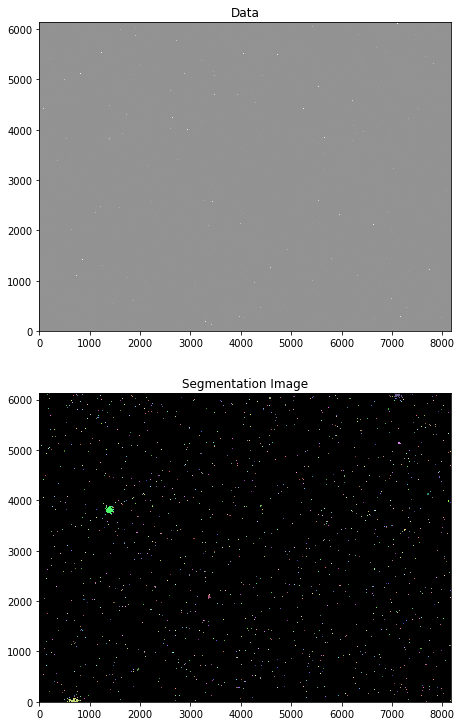

In [32]:
from photutils import detect_sources
segm = detect_sources(image_data, threshold, npixels=5)
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12.5))
ax1.imshow(image_data, origin='lower', cmap='Greys_r', norm=norm)
ax1.set_title('Data')
cmap = segm.make_cmap(random_state=12345)
ax2.imshow(segm, origin='lower', cmap=cmap)
ax2.set_title('Segmentation Image')

In [6]:
hdu_list.info()

Filename: ../Data/fits/calexp-1-136326.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  COMPRESSED_IMAGE    1 PrimaryHDU     157   ()      
  1                1 CompImageHDU     86   (8176, 6132)   int32   
  2                1 CompImageHDU     92   (8176, 6132)   int32   
  3                1 CompImageHDU     86   (8176, 6132)   int32   
  4                1 BinTableHDU     40   35R x 7C   [1J, 1J, 1J, 1J, 1J, 64A, 64A]   
  5                1 BinTableHDU     20   4R x 2C   [64A, 1J]   
  6                1 BinTableHDU     40   2R x 6C   [1J, 1J, 1J, 1J, 1J, 9D]   
  7                1 BinTableHDU     40   3R x 6C   [1J, 1J, 1J, 1J, 1J, 1D]   
  8                1 BinTableHDU     26   1R x 3C   [1J, 1D, 1D]   
  9                1 BinTableHDU     40   1R x 6C   [1J, 1J, 1J, 1J, 6J, 6J]   
 10                1 BinTableHDU     36   6R x 5C   [6D, 1D, 1D, 1D, 1D]   
 11                1 BinTableHDU     36   6R x 5C   [1J, 1J, 1J, 1J, 729D]   
 12                1 B

In [36]:
from photutils import deblend_sources
segm_deblend = deblend_sources(image_data, segm, npixels=5, nlevels=32,contrast=0.001)

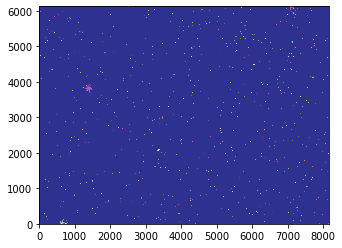

In [40]:
plt.imshow(segm_deblend, origin='lower', cmap=cmap, norm=norm)

In [42]:
>>> from photutils import source_properties
>>> cat = source_properties(image_data, segm_deblend)
>>> tbl = cat.to_table()
>>> tbl['xcentroid'].info.format = '.2f'  # optional format
>>> tbl['ycentroid'].info.format = '.2f'
>>> tbl['cxx'].info.format = '.2f'
>>> tbl['cxy'].info.format = '.2f'
>>> tbl['cyy'].info.format = '.2f'
>>> tbl['gini'].info.format = '.2f'
>>> print(tbl)

  id  xcentroid ycentroid sky_centroid ...   cxx      cxy      cyy    gini
         pix       pix                 ... 1 / pix2 1 / pix2 1 / pix2     
----- --------- --------- ------------ ... -------- -------- -------- ----
    1    542.27      1.56         None ...     2.33     2.44     1.29 0.10
    2    546.49      3.04         None ...     0.45     0.31     0.27 0.15
    3    798.78      0.85         None ...     2.06    -0.21     1.72 0.11
    4    827.61      1.25         None ...     0.93     0.01     1.26 0.13
    5    854.34      1.36         None ...     0.51     0.16     1.30 0.08
    6    859.18      1.40         None ...     7.15     0.97     0.99 0.10
    7    879.18      1.48         None ...     1.89     0.19     0.98 0.06
    8   2070.28      0.47         None ...     0.21    -0.03     2.90 0.17
    9   4002.37      1.32         None ...     0.43    -1.09     1.87 0.16
   10   4228.72      0.68         None ...     0.32    -0.65     2.02 0.30
  ...       ...       ...